<a href="https://colab.research.google.com/github/AlexanderSychev2005/AlexanderSychev2005/blob/main/rgr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode


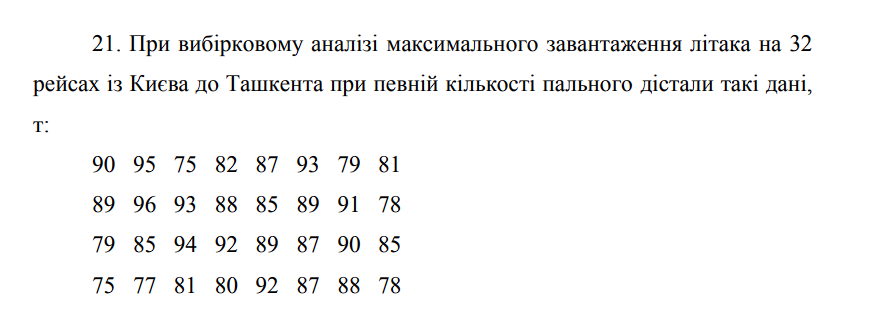

In [2]:
# Data
weights = np.array([
    90, 95, 75, 82, 87, 93, 79, 81,
    89, 96, 93, 88, 85, 89, 91, 78,
    79, 85, 94, 92, 89, 87, 90, 85,
    75, 77, 81, 80, 92, 87, 88, 78
])

In [3]:
# Дискретний розподіл
unique, counts = np.unique(weights, return_counts=True)

In [33]:
n = len(weights)
max_value = np.max(weights)
min_value = np.min(weights)
print(n)
print("Max value:", max_value)
print("Min value:", min_value)

32
Max value: 96
Min value: 75


In [5]:
relative_freq = counts / n

In [41]:
discrete_df = pd.DataFrame({'Value (x)': unique, 'Frequency (ni)': counts, 'Relative Frequency (wi)': relative_freq})


## Дискретний статистичний розподіл

In [43]:
discrete_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Value (x),75.0000,77.00000,78.0000,79.0000,80.00000,81.0000,82.00000,85.00000,87.00000,88.0000,89.00000,90.0000,91.00000,92.0000,93.0000,94.00000,95.00000,96.00000
Frequency (ni),2.0000,1.00000,2.0000,2.0000,1.00000,2.0000,1.00000,3.00000,3.00000,2.0000,3.00000,2.0000,1.00000,2.0000,2.0000,1.00000,1.00000,1.00000
Relative Frequency (wi),0.0625,0.03125,0.0625,0.0625,0.03125,0.0625,0.03125,0.09375,0.09375,0.0625,0.09375,0.0625,0.03125,0.0625,0.0625,0.03125,0.03125,0.03125


In [36]:
num_of_intervals = int(np.round(3.322 * np.log10(n) + 1))
print("Number of intervals: ", num_of_intervals)
interval_step = (max_value - min_value) / num_of_intervals
print("Interval step: ", interval_step)
3.322 * np.log10(n) + 1

Number of intervals:  6
Interval step:  3.5


6.000108227978728

In [9]:
hist, bin_edges = np.histogram(weights, bins=num_of_intervals)
hist, bin_edges

(array([5, 5, 4, 5, 8, 5]), array([75. , 78.5, 82. , 85.5, 89. , 92.5, 96. ]))

In [49]:
relative_hist = hist / len(weights)
intervals = [
    f"[{bin_edges[0]:.1f}, {bin_edges[1]:.1f})"
] + [
    f"({bin_edges[i]:.1f}, {bin_edges[i+1]:.1f})" for i in range(1, len(bin_edges)-2)
] + [
    f"({bin_edges[-2]:.1f}, {bin_edges[-1]:.1f}]"
]

interval_df = pd.DataFrame({'Interval (x)': intervals, 'Frequency (ni)': hist, 'Relative Frequency (w*i)': relative_hist})
interval_df["Density (wi / h)"] = relative_hist / interval_step

In [50]:
interval_df.T

,0,1,2,3,4,5
Interval (x),"[75.0, 78.5)","(78.5, 82.0)","(82.0, 85.5)","(85.5, 89.0)","(89.0, 92.5)","(92.5, 96.0]"
Frequency (ni),5,5,4,5,8,5
Relative Frequency (w*i),0.15625,0.15625,0.125,0.15625,0.25,0.15625
Density (wi / h),0.044643,0.044643,0.035714,0.044643,0.071429,0.044643


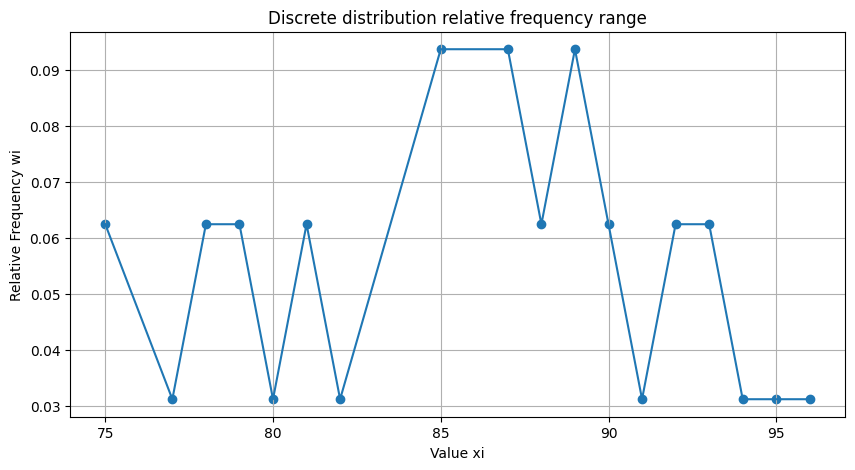

In [45]:
# Полігон відносних частот дискретного розподілу
plt.figure(figsize=(10, 5))
plt.plot(unique, relative_freq)
plt.scatter(unique, relative_freq)
plt.xlabel('Value xi')
plt.ylabel('Relative Frequency wi')
plt.title('Discrete distribution relative frequency range')
plt.grid()
plt.show()

In [13]:
centres = (bin_edges[:-1] + bin_edges[1:]) / 2
centres

array([76.75, 80.25, 83.75, 87.25, 90.75, 94.25])

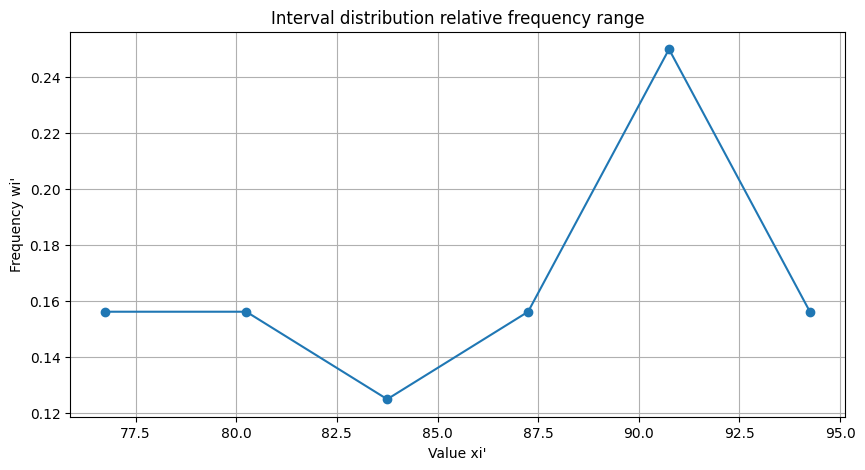

In [48]:
# Полігон відносних частот інтервального розподілу
plt.figure(figsize=(10, 5))
plt.plot(centres, relative_hist)
plt.scatter(centres, relative_hist)
plt.xlabel("Value xi'")
plt.ylabel("Frequency wi'")
plt.title('Interval distribution relative frequency range')
plt.grid()
plt.show()

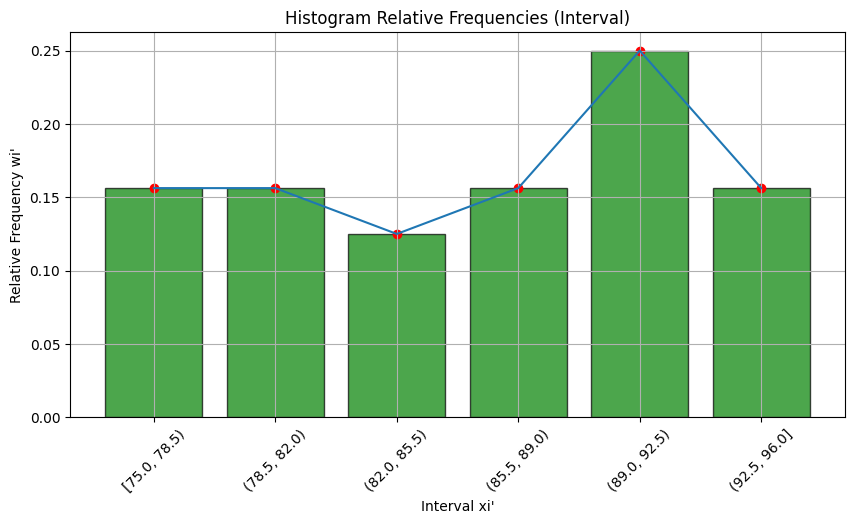

In [56]:
# Графік відносних частот (інтервальний)
plt.figure(figsize=(10, 5))
plt.bar(intervals, relative_hist, alpha=0.7, color='g', edgecolor='black')
plt.plot(intervals, relative_hist)
plt.scatter(intervals, relative_hist, color='r')
plt.xlabel("Interval xi'")
plt.ylabel("Relative Frequency wi'")
plt.title('Histogram Relative Frequencies (Interval)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

[0.0625  0.09375 0.15625 0.21875 0.25    0.3125  0.34375 0.4375  0.53125
 0.59375 0.6875  0.75    0.78125 0.84375 0.90625 0.9375  0.96875 1.     ]
values [75 77 78 79 80 81 82 85 87 88 89 90 91 92 93 94 95 96]


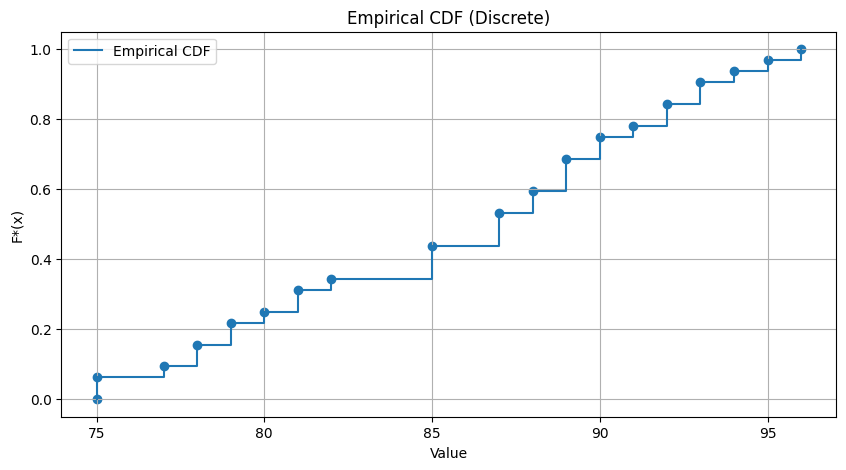

In [58]:
# Емпірична функція розподілу (дискретна)
empirical_cdf = np.cumsum(relative_freq)
print(empirical_cdf)
print("values", unique)
values = np.insert(unique, 0, 75)
empirical_cdf = np.insert(empirical_cdf, 0, 0)
plt.figure(figsize=(10, 5))
plt.step(values, empirical_cdf, where='post', label='Empirical CDF')
plt.scatter(values, empirical_cdf)
plt.xlabel('Value')
plt.ylabel('F*(x)')
plt.title('Empirical CDF (Discrete)')
plt.legend()
plt.grid()
plt.show()

In [65]:
cdf_interval = np.cumsum(relative_hist)
cdf_interval = np.insert(cdf_interval, 0, 0)
print(cdf_interval)
print(bin_edges)

[0.      0.15625 0.3125  0.4375  0.59375 0.84375 1.     ]
[75.  78.5 82.  85.5 89.  92.5 96. ]


[75.  78.5 82.  85.5 89.  92.5 96. ]
[0.      0.15625 0.3125  0.4375  0.59375 0.84375 1.     ]


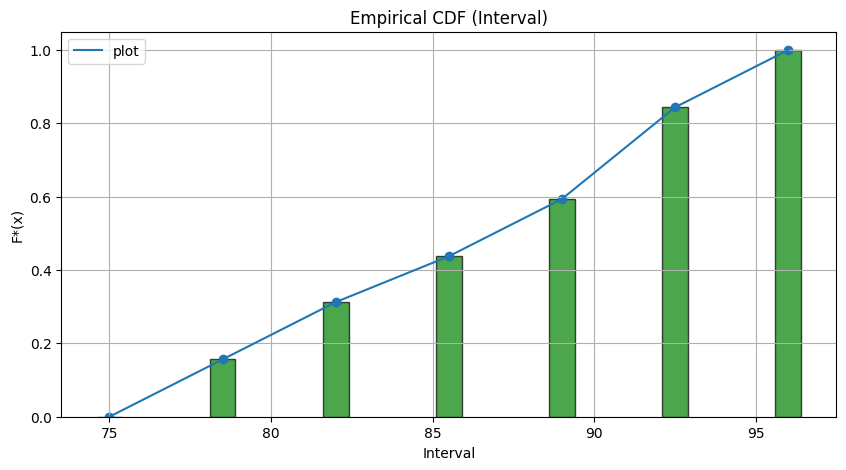

In [66]:
# Емпірична функція розподілу (інтервальна)
plt.figure(figsize=(10, 5))
plt.bar(bin_edges, cdf_interval, alpha=0.7, color='g', edgecolor='black')
print(bin_edges)
print(cdf_interval)
plt.scatter(bin_edges, cdf_interval)
plt.plot(bin_edges, cdf_interval, label='plot')
plt.xlabel('Interval')
plt.ylabel('F*(x)')
plt.title('Empirical CDF (Interval)')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Мода та медіана
mode_value, mode_count = mode(weights)
median_value = np.median(weights)
mode_value
print(f"Mode (discrete): {mode_value}, Frequency: {mode_count}")
print(f"Median (discrete): {median_value}")

Mode (discrete): 85, Frequency: 3
Median (discrete): 87.0
